1 - Basic Use of HDBSCAN

We gonna start with a dataset from sklearn

In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import hdbscan

In [3]:
blobs, labels = make_blobs(n_samples=2000, n_features=10)
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.718555,5.192455,-4.609490,-6.008099,5.577635,2.551255,7.981957,4.247009,-2.911043,-1.782484
1,-8.216813,5.189928,2.106575,-3.467069,5.753620,-0.438735,3.797698,4.284675,10.226963,-1.631878
2,7.655796,-11.260280,-7.971762,-9.237818,-5.499976,-3.662753,4.197304,-7.652421,-7.588009,6.463407
3,-9.115981,7.156830,3.122177,-2.859672,4.988889,-1.455778,5.637684,1.745709,10.369541,-1.270515
4,-4.050349,4.471517,-5.019896,-8.252516,5.956267,1.288117,8.025124,4.312571,-4.490632,-0.715445


Next step is do the simple clustering using the HDBSCAN. The first print is an array with the cluster number of each samples. The second print is the number maximum of clusters in the dataset (in this case there are 3 clusters (0 1 2)). The last print is the number of probabilities, 0 means the element is a noise and 1 means the element is in the center os group. 

In [4]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(blobs)
print(clusterer.labels_)
print(clusterer.labels_.max())
print(clusterer.probabilities_)

[1 2 0 ... 0 1 2]
2
[0.82558637 0.87241241 0.71866652 ... 0.81876606 0.85967303 0.65926853]


We can use a distance matrix to fit.

In [5]:
from sklearn.metrics.pairwise import pairwise_distances

In [6]:
distance_matrix = pairwise_distances(blobs)
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
clusterer.labels_

array([1, 2, 0, ..., 0, 1, 2], dtype=int64)

2 - Getting more information about a clustering

The image below is the dataset without clustering

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.load('clusterable_data.npy')
data, data.shape

(array([[-0.12153499, -0.22876337],
        [-0.22093687, -0.25251088],
        [ 0.1259037 , -0.27314321],
        ...,
        [ 0.50243143, -0.3002958 ],
        [ 0.53822256,  0.19412199],
        [-0.08688887, -0.2092721 ]]),
 (2309, 2))

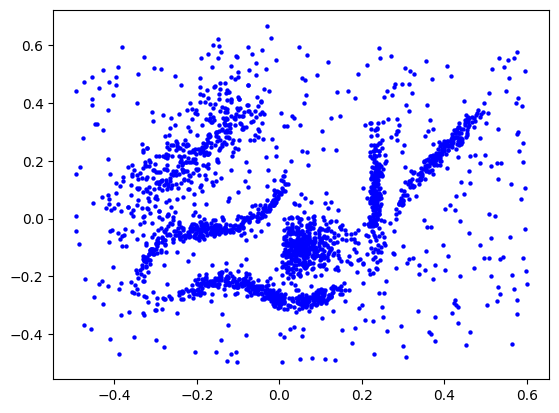

In [8]:
plt.scatter(*data.T, s=10, linewidth=0, c='b', alpha=1)

The image below is the dataset with clustering.

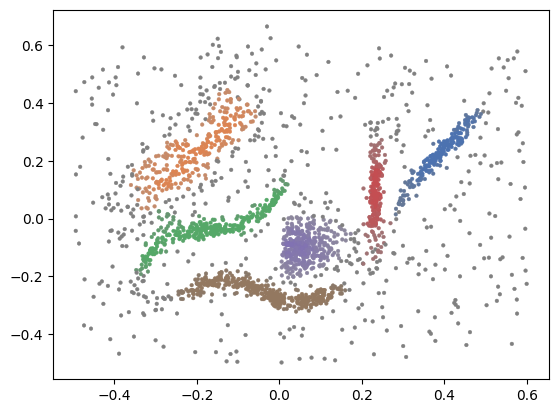

In [9]:
#doing the clustering with a min_number of 15 and fit
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=7, linewidth=0.3, c=cluster_member_colors, alpha=1)

The figure below is a condensed tree and show the hierarchy clustering and distribution os elements in each cluster. Also, show the clusters selected with an elipse.

<AxesSubplot: ylabel='$\\lambda$ value'>

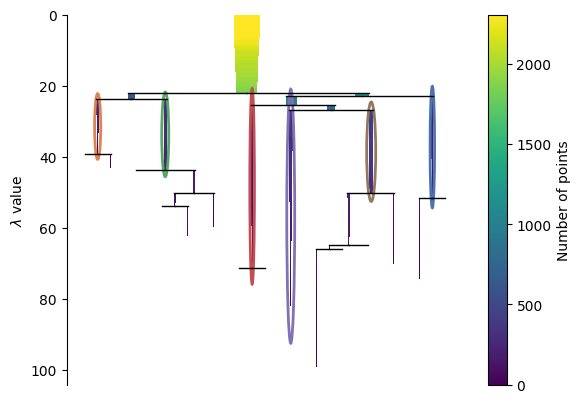

In [10]:
clusterer.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 8))

array([ 0, -1,  0, ..., -1, -1,  0], dtype=int64)

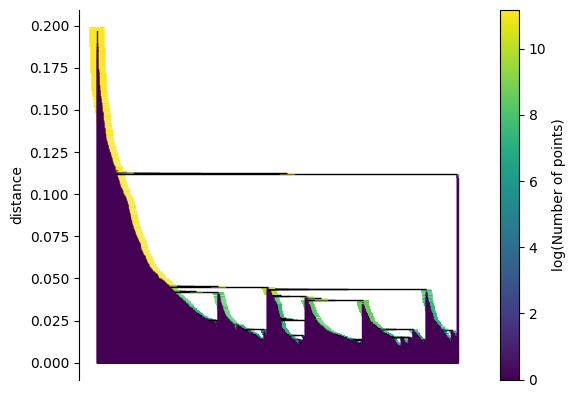

In [11]:
clusterer.single_linkage_tree_.plot(),
clusterer.single_linkage_tree_.get_clusters(0.023, min_cluster_size=2)

3- Parameter Selection for HDBSCAN

There are a lot parameters in HDBSCAN, but only some are importants. 

3.1 - min_cluster_size

The min_cluster_size is the most important parameter in the HDBSCAN, because it's the minimum number of elements that become a cluster.

In [12]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
digits = load_digits()
data = digits.data
projection= TSNE().fit_transform(data)

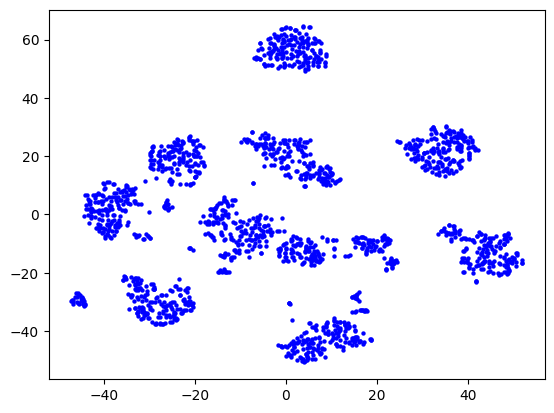

In [13]:
plt.scatter(*projection.T, s=10, linewidth=0, c='b', alpha=1)

10

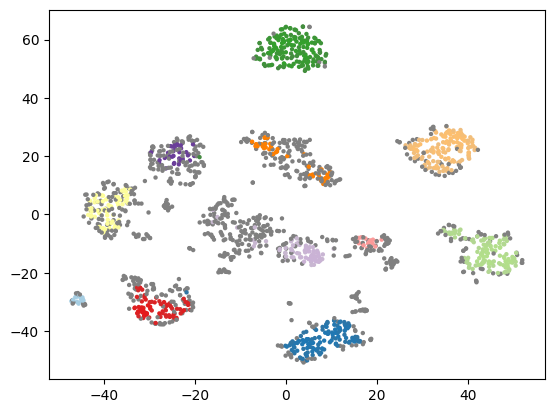

In [14]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

6

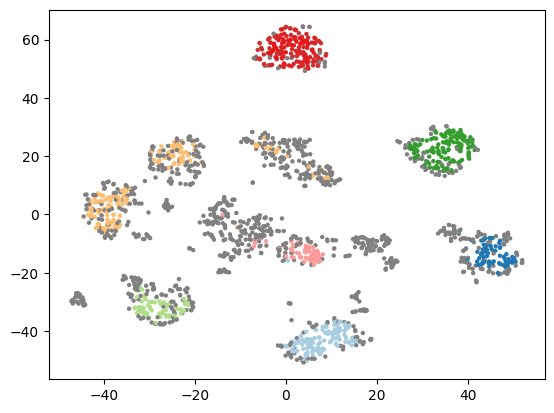

In [15]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

1

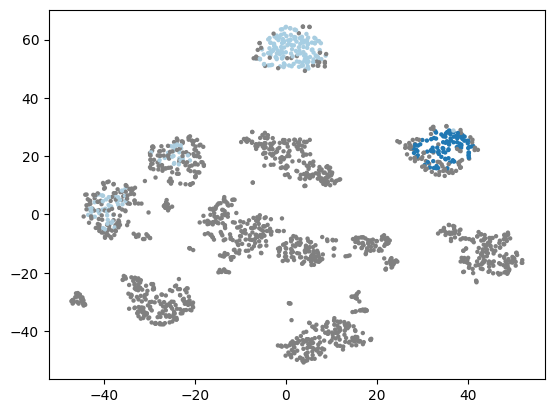

In [16]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

10

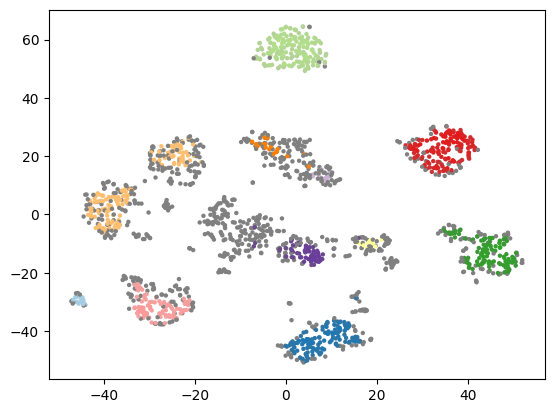

In [17]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=13).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

3.2 - min_samples

The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, and clusters will be restricted to progressively more dense areas.

8

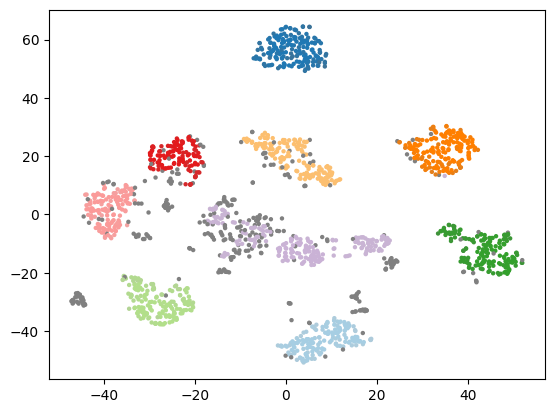

In [18]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=1).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

3.3 - cluster_selection_method

8

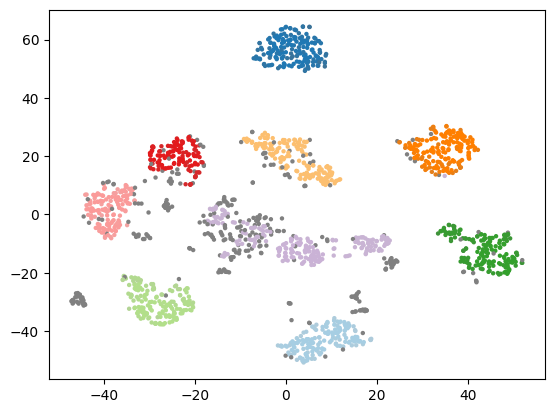

In [19]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=1,cluster_selection_method='leaf').fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

3.4 - allow_single_cluster=True

8

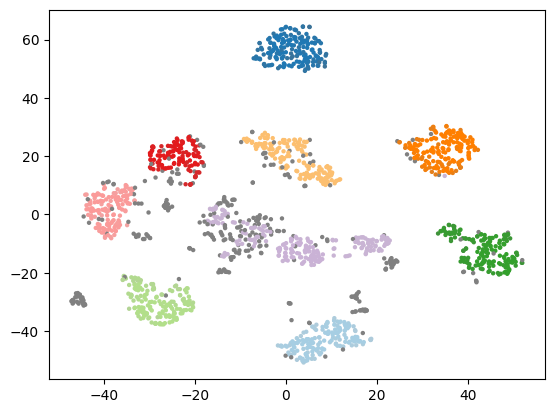

In [20]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=1,cluster_selection_method='leaf',allow_single_cluster=True).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

4 - Outliers

As we know the DBSCAN work very well in the detection of outliers. However, the K-Means does not.

In [21]:
data = np.load('clusterable_data.npy')
clusterer = hdbscan.HDBSCAN(min_cluster_size=45,min_samples=1 ).fit(data)
clusterer.outlier_scores_

array([0.10843883, 0.13004625, 0.04372601, ..., 0.51592521, 0.2583825 ,
       0.10149147])

C:\Users\brain\AppData\Local\Temp\ipykernel_8116\3693830524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)


<AxesSubplot: ylabel='Density'>

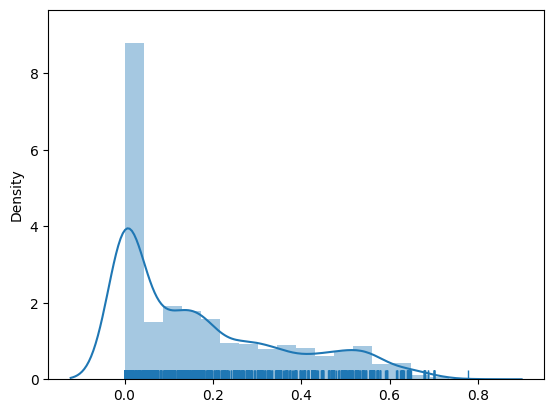

In [22]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

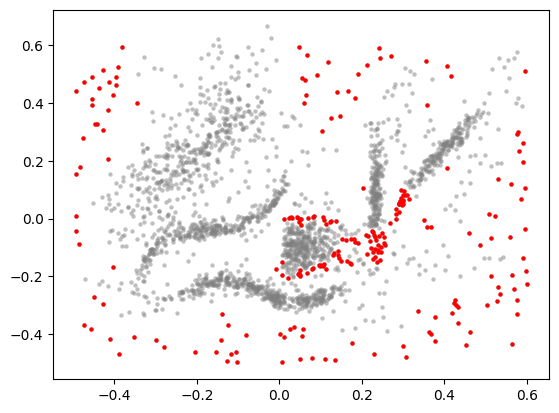

In [23]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*data.T, s=10, linewidth=0, c='gray', alpha=0.5)
plt.scatter(*data[outliers].T, s=10, linewidth=0, c='red', alpha=1)

Note that not only are the outlying border points highlighted as outliers, but points at the edge of the central ball like cluster, and just below the vertical band cluster, are also designated as outliers. This is because those two clusters are extremely dense, and the points at the edge of this cluster are close enough to the cluster that they should be part of it, but far enough from the being core parts of the cluster that they are extremely unlikely and hence anomalous.

4 - Predicting clusters for new points

In the real world, the data is not fixed. So, the HDBSCAN has to predict and add the new data in the cluster formed. 

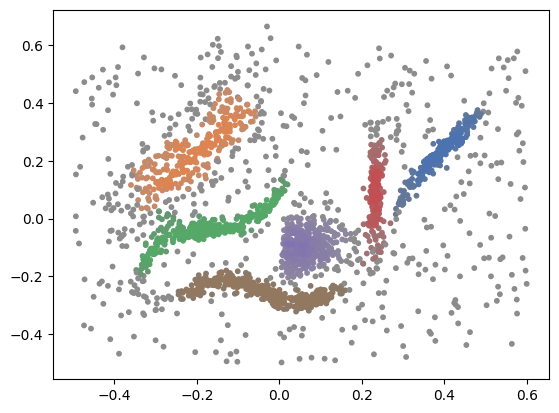

In [24]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data=True).fit(data)
pal = sns.color_palette('deep', 8)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=colors, s= 10, alpha=1);

The black points are the new data.

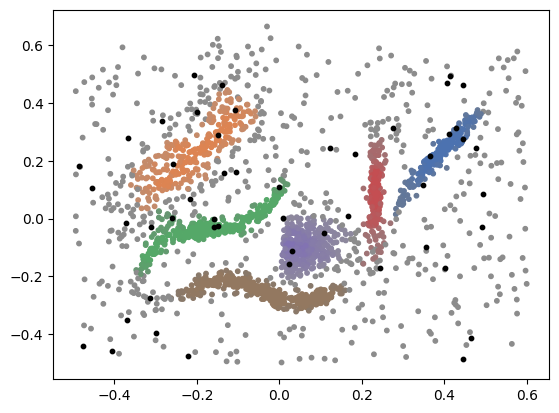

In [25]:
test_points = np.random.random(size=(50, 2)) - 0.5

colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=colors,s=10,alpha=1);
plt.scatter(*test_points.T, c='black', s=10,alpha=1)

With the function 'approximate_predict' is possible to predict which cluster will receive each new data.

In [26]:
test_labels, strengths = hdbscan.approximate_predict(clusterer, test_points)
test_labels

array([-1, -1, -1, -1,  0, -1,  0,  1,  0, -1,  4,  2, -1, -1, -1, -1,  0,
       -1,  4, -1,  1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,
        1,  2, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,  2,  0, -1])

So, the new data go to the cluster or become a outlier.

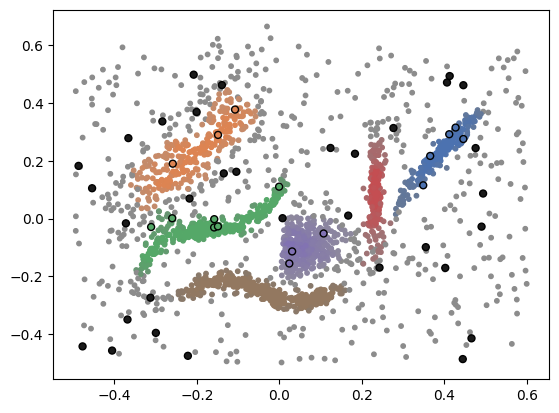

In [27]:
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
test_colors = [pal[col] if col >= 0 else (0.1, 0.1, 0.1) for col in test_labels]
plt.scatter(data.T[0], data.T[1], c=colors,s=10,alpha=1);
plt.scatter(*test_points.T, c=test_colors, s=25, linewidths=1, edgecolors='k',alpha=1)

5 - Soft Clustering for HDBSCAN

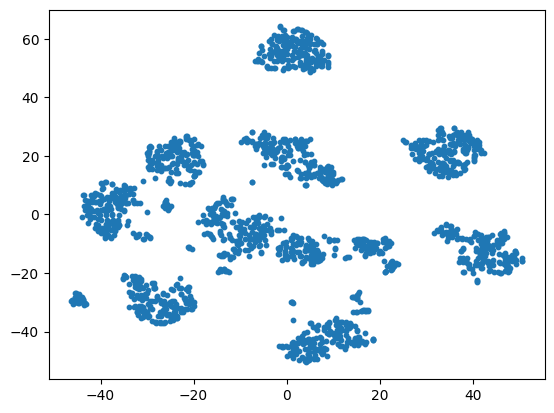

In [28]:
from sklearn import datasets

digits = datasets.load_digits()
data = digits.data
projection = TSNE().fit_transform(data)
plt.scatter(*projection.T,s=10,alpha=1)

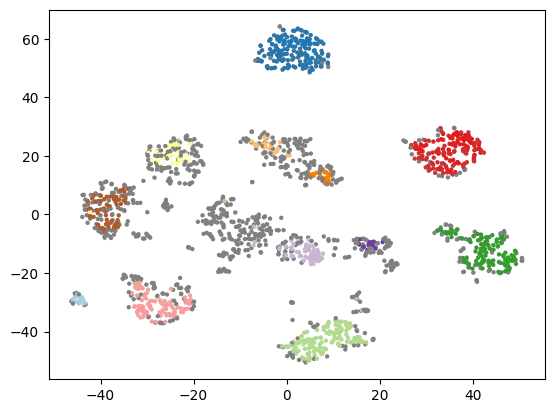

In [29]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=10, linewidth=0, c=cluster_member_colors, alpha=1)

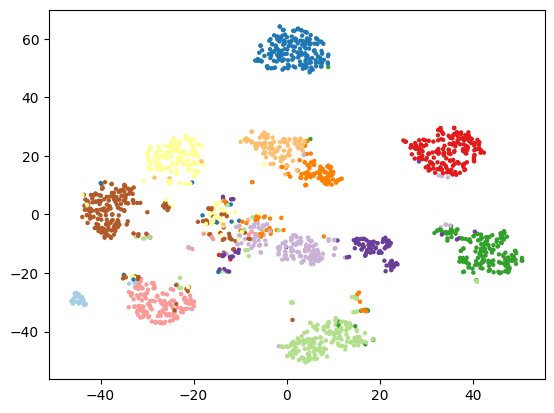

In [30]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[np.argmax(x)]
                  for x in soft_clusters]
plt.scatter(*projection.T, s=10, linewidth=0, c=cluster_colors, alpha=1)

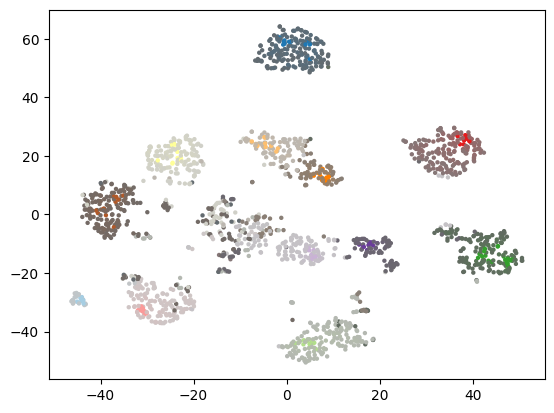

In [31]:
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [sns.desaturate(color_palette[np.argmax(x)], np.max(x))
                  for x in soft_clusters]
plt.scatter(*projection.T, s=10, linewidth=0, c=cluster_colors, alpha=1)

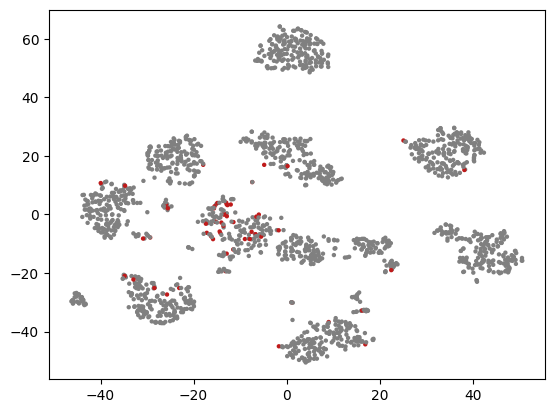

In [32]:
def top_two_probs_diff(probs):
    sorted_probs = np.sort(probs)
    return sorted_probs[-1] - sorted_probs[-2]

# Compute the differences between the top two probabilities
diffs = np.array([top_two_probs_diff(x) for x in soft_clusters])
# Select out the indices that have a small difference, and a larger total probability
mixed_points = np.where((diffs < 0.001) & (np.sum(soft_clusters, axis=1) > 0.5))[0]

colors = [(0.75, 0.1, 0.1) if x in mixed_points
          else (0.5, 0.5, 0.5) for x in range(data.shape[0])]
plt.scatter(*projection.T, s=10, linewidth=0, c=colors, alpha=1)

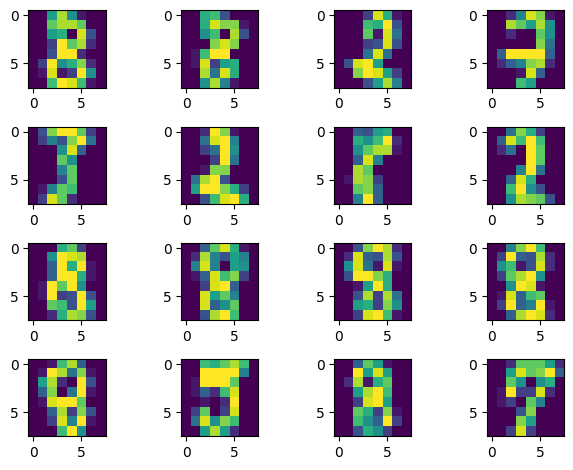

In [33]:
fig = plt.figure()
for i, image in enumerate(digits.images[mixed_points][:16]):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(image)
plt.tight_layout()

6 - How HDBSCAN works?

As we know the HDBSCAN is the DBSCAN plus SINGLE LINK, but how all these are combinated? 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data

sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 1, 's' : 50, 'linewidths':0}

Our dataset is the famous two bananas, which is a non convex dataset.

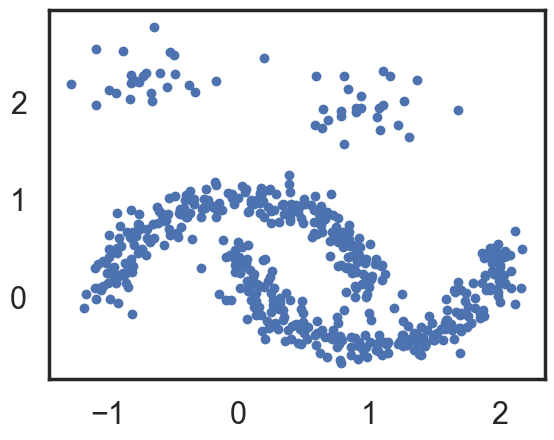

In [35]:
moons, _ = data.make_moons(n_samples=500, noise=0.1)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(*test_data.T, color='b', **plot_kwds)

In [36]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

these are the step of HDSCAN:

1 - Transform the space according to the density/sparsity.

2 - Build the minimum spanning tree of the distance weighted graph.

3 - Construct a cluster hierarchy of connected components.

4 - Condense the cluster hierarchy based on minimum cluster size.

5 - Extract the stable clusters from the condensed tree.

1 - Transform the space according to the density/sparsity

We need an estimate of density that is mutual reachability distance: D(a,b) = max(core(a),core(b),dist(a,b))

2 - Build the minimum spanning tree of the distance weighted graph.

Consider the data as a weighted graph with the data points as vertices and an edge between any two points with weight equal to the mutual reachability distance of those points.

Consider a threshold value, starting high, and steadily being lowered. Drop any edges with weight above that threshold. So, after we gonna get in minimum spanning tree of the graph.

<AxesSubplot: >

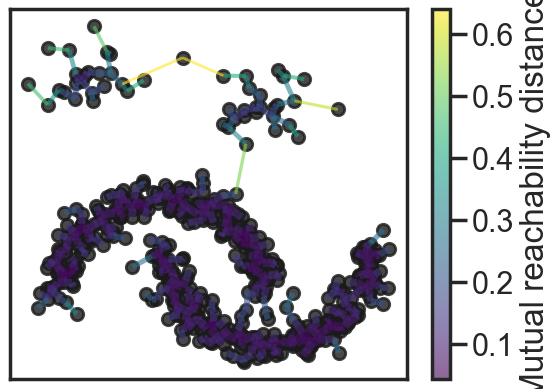

In [37]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',edge_alpha=0.6,node_size=80,edge_linewidth=2)

3 - Construct a cluster hierarchy of connected components.


Given the minimum spanning tree is possible to get the hierarchy of connected components. Sort the edges of the tree by distance (in increasing order) and then iterate through, creating a new merged cluster for each edge.

<AxesSubplot: ylabel='distance'>

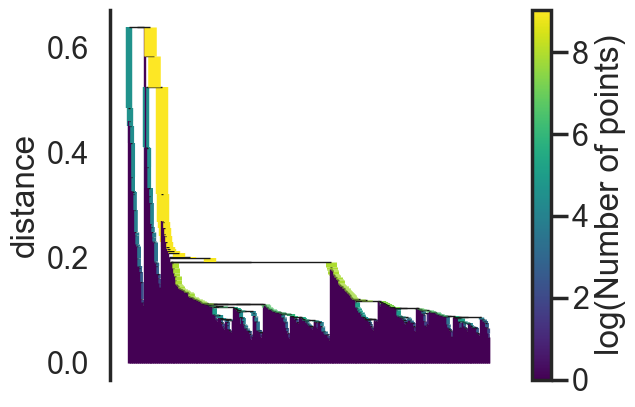

In [38]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

4 - Condense the cluster hierarchy based on minimum cluster size.


To make this concrete we need a notion of minimum cluster size which we take as a parameter to HDBSCAN. Once we have a value for minimum cluster size we can now walk through the hierarchy and at each split ask if one of the new clusters created by the split has fewer points than the minimum cluster size. If it is the case that we have fewer points than the minimum cluster size we declare it to be ‘points falling out of a cluster’ and have the larger cluster retain the cluster identity of the parent, marking down which points ‘fell out of the cluster’ and at what distance value that happened.

<AxesSubplot: ylabel='$\\lambda$ value'>

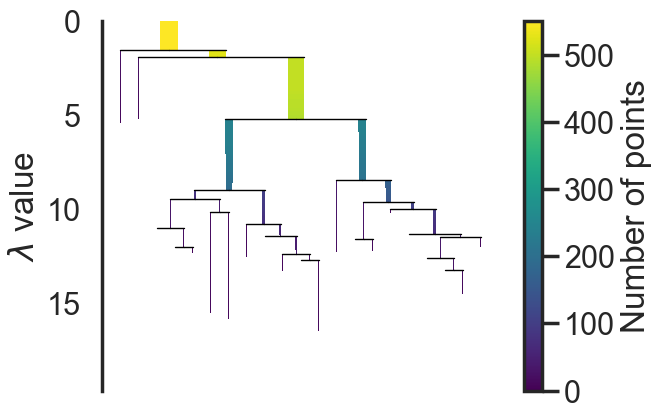

In [39]:
clusterer.condensed_tree_.plot()

5 - Extract the stable clusters from the condensed tree.

the new metric is a = 1/distance.
Every Cluster has an a(birth){lambda value when the cluster split off and became it’s own cluster} and a(death) {lambda value [if any] when the cluster split into smaller clusters}. There is the value 'ap' which is a value between a(birth) and a(death) that point ‘fell out of the cluster'. Now, for each cluster compute the stability as ∑(ap - a(birth)).
Declare all leaf nodes to be selected clusters. Now work up through the tree (the reverse topological sort order). If the sum of the stabilities of the child clusters is greater than the stability of the cluster, then we set the cluster stability to be the sum of the child stabilities. If, on the other hand, the cluster’s stability is greater than the sum of its children then we declare the cluster to be a selected cluster and unselect all its descendants. Once we reach the root node we call the current set of selected clusters our flat clustering and return that.



<AxesSubplot: ylabel='$\\lambda$ value'>

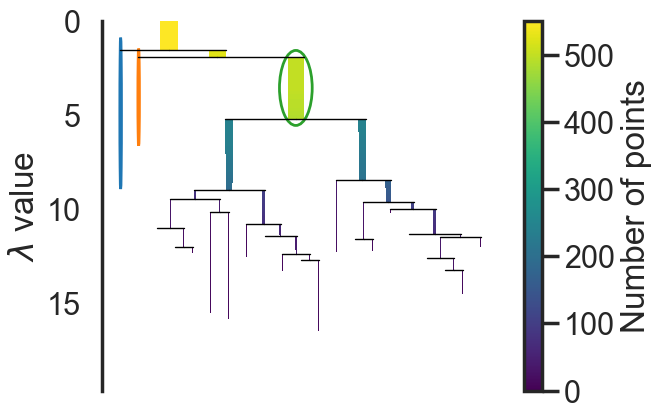

In [40]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())


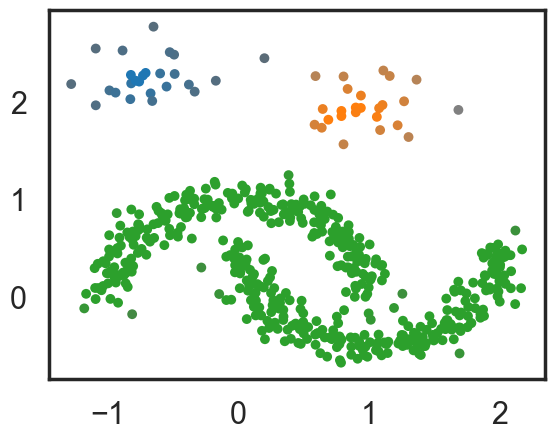

In [41]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(*test_data.T, c=cluster_colors, **plot_kwds)

7 - How Soft Clustering for HDBSCAN Works

In Soft Clustering each element will have a probability to be in a cluster.

In [196]:
from scipy.spatial.distance import cdist

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

plot_kwds={'alpha':1, 's':28, 'linewidths':0.5}
palette = sns.color_palette("bright",12)

[]

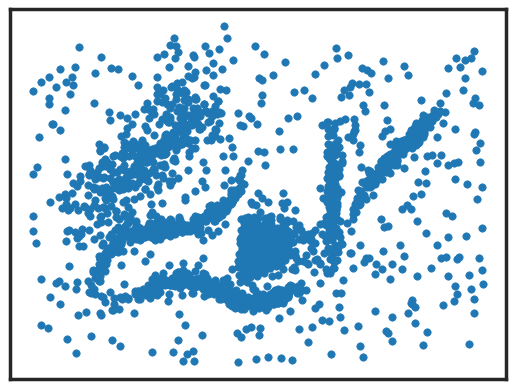

In [197]:
data = np.load('clusterable_data.npy')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(data.T[0], data.T[1], **plot_kwds)
ax.set_xticks([])
ax.set_yticks([])

In [198]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)

In the figure below, there are some clusters, but has a lot outliers.

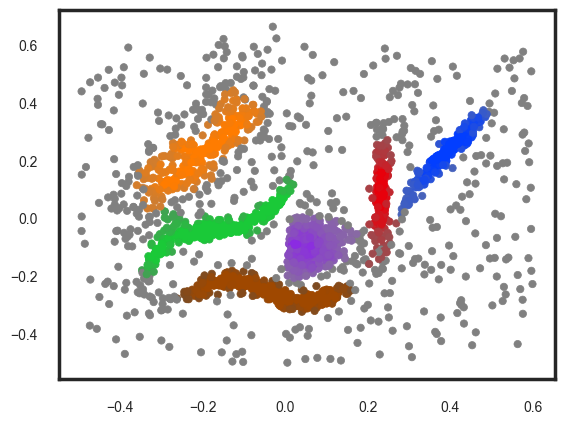

In [199]:
pal = sns.color_palette("bright",12)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(*data.T, c=colors, **plot_kwds)
plt.tick_params(labelsize=10)

1 - Distance Association

The distance association need exemplars, the points that persist in the cluster (and it’s children in the HDBSCAN condensed tree) for the longest range of lambda values – such points represent the “heart” of the cluster around which the ultimate cluster forms.

In [200]:
def exemplars(cluster_id, condensed_tree):
    raw_tree = condensed_tree._raw_tree
    # Just the cluster elements of the tree, excluding singleton points
    cluster_tree = raw_tree[raw_tree['child_size'] > 1]
    # Get the leaf cluster nodes under the cluster we are considering
    leaves = hdbscan.plots._recurse_leaf_dfs(cluster_tree, cluster_id)
    # Now collect up the last remaining points of each leaf cluster (the heart of the leaf)
    result = np.array([])
    for leaf in leaves:
        max_lambda = raw_tree['lambda_val'][raw_tree['parent'] == leaf].max()
        points = raw_tree['child'][(raw_tree['parent'] == leaf) &
                                   (raw_tree['lambda_val'] == max_lambda)]
        result = np.hstack((result, points))
    return result.astype(np.intc)

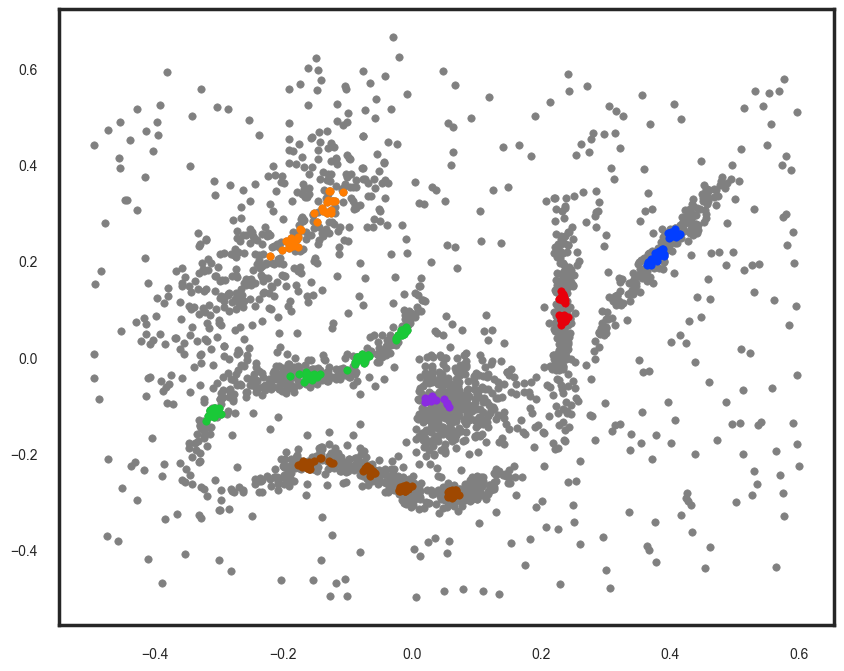

In [236]:
%%capture --no-display
tree = clusterer.condensed_tree_
plt.figure(figsize=(10, 8))
plt.scatter(*data.T, c='grey', **plot_kwds)
plt.tick_params(labelsize=10)
for i, c in enumerate(tree._select_clusters()):
    c_exemplars = exemplars(c, tree)
    plt.scatter(data.T[0][c_exemplars], data.T[1][c_exemplars], c=palette[i],**plot_kwds)

We have an funtion that return exemplars. Now, we gonna calculate the distance of between each outlier and examplars to determine the cluster os outliers.

In [260]:
def dist_membership_vector(point, exemplar_dict, data, softmax=False):
    if softmax:
        result = np.exp(1./dist_vector(point, exemplar_dict, data))
        result[~np.isfinite(result)] = np.finfo(np.double).max
    else:
        result = 1./dist_vector(point, exemplar_dict, data)
        result[~np.isfinite(result)] = np.finfo(np.double).max
    result /= result.sum()
    return result

C:\Users\brain\AppData\Local\Temp\ipykernel_8116\3033185213.py:6: RuntimeWarning: divide by zero encountered in divide
  result = 1./dist_vector(point, exemplar_dict, data)


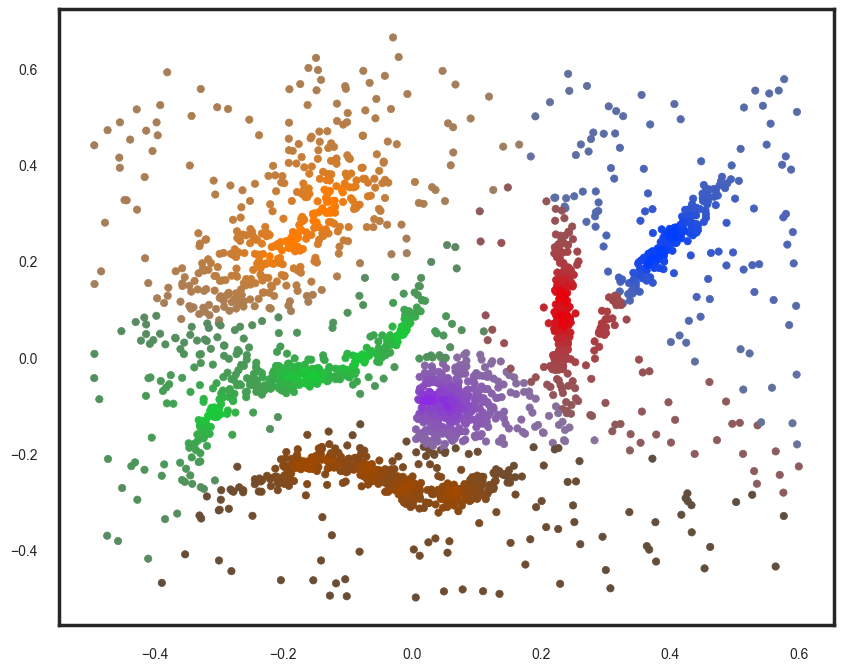

In [261]:
exemplar_dict = {c:exemplars(c,tree) for c in tree._select_clusters()}
colors = np.empty((data.shape[0], 3))
for x in range(data.shape[0]):
    membership_vector = dist_membership_vector(x, exemplar_dict, data)
    color = np.argmax(membership_vector)
    saturation = membership_vector[color]
    colors[x] = sns.desaturate(pal[color], saturation)
plt.figure(figsize=(10, 8))
plt.tick_params(labelsize=10)
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)


2 - Outlier Association

In [262]:
def max_lambda_val(cluster, tree):
    cluster_tree = tree[tree['child_size'] > 1]
    leaves = hdbscan.plots._recurse_leaf_dfs(cluster_tree, cluster)
    max_lambda = 0.0
    for leaf in leaves:
        max_lambda = max(max_lambda,
                         tree['lambda_val'][tree['parent'] == leaf].max())
    return max_lambda

def points_in_cluster(cluster, tree):
    leaves = hdbscan.plots._recurse_leaf_dfs(tree, cluster)
    return leaves

In [263]:
def merge_height(point, cluster, tree, point_dict):
    cluster_row = tree[tree['child'] == cluster]
    cluster_height = cluster_row['lambda_val'][0]
    if point in point_dict[cluster]:
        merge_row = tree[tree['child'] == float(point)][0]
        return merge_row['lambda_val']
    else:
        while point not in point_dict[cluster]:
            parent_row = tree[tree['child'] == cluster]
            cluster = parent_row['parent'].astype(np.float64)[0]
        for row in tree[tree['parent'] == cluster]:
            child_cluster = float(row['child'])
            if child_cluster == point:
                return row['lambda_val']
            if child_cluster in point_dict and point in point_dict[child_cluster]:
                return row['lambda_val']

In [264]:
def per_cluster_scores(point, cluster_ids, tree, max_lambda_dict, point_dict):
    result = {}
    point_row = tree[tree['child'] == point]
    point_cluster = float(point_row[0]['parent'])
    max_lambda = max_lambda_dict[point_cluster] + 1e-8 # avoid zero lambda vals in odd cases

    for c in cluster_ids:
        height = merge_height(point, c, tree, point_dict)
        result[c] = (max_lambda / (max_lambda - height))
    return result

In [265]:
def outlier_membership_vector(point, cluster_ids, tree,
                              max_lambda_dict, point_dict, softmax=True):
    if softmax:
        result = np.exp(np.array(list(per_cluster_scores(point,
                                                         cluster_ids,
                                                         tree,
                                                         max_lambda_dict,
                                                         point_dict
                                                        ).values())))
        result[~np.isfinite(result)] = np.finfo(np.double).max
    else:
        result = np.array(list(per_cluster_scores(point,
                                                  cluster_ids,
                                                  tree,
                                                  max_lambda_dict,
                                                  point_dict
                                                 ).values()))
    result /= result.sum()
    return result

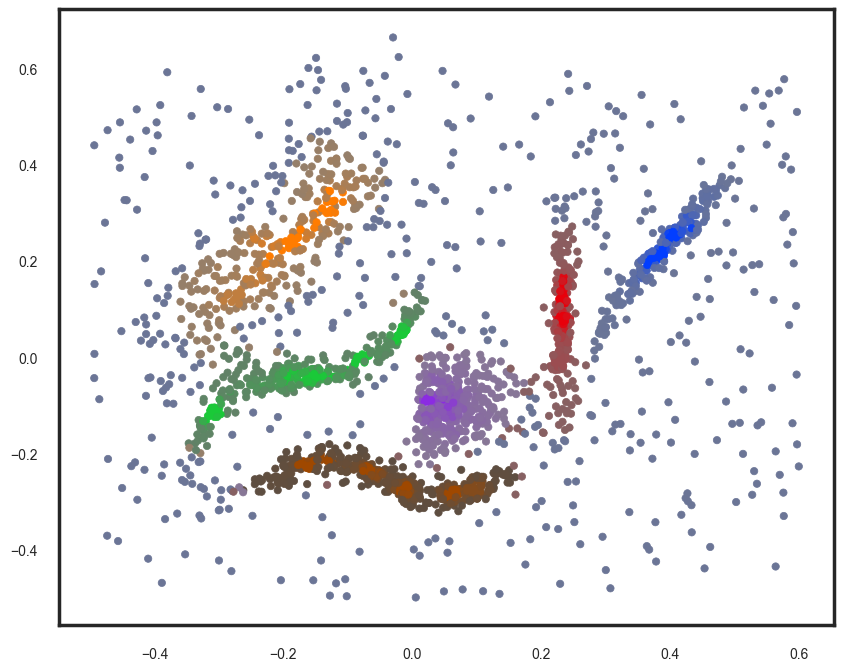

In [266]:
cluster_ids = tree._select_clusters()
raw_tree = tree._raw_tree
all_possible_clusters = np.arange(data.shape[0], raw_tree['parent'].max() + 1).astype(np.float64)
max_lambda_dict = {c:max_lambda_val(c, raw_tree) for c in all_possible_clusters}
point_dict = {c:set(points_in_cluster(c, raw_tree)) for c in all_possible_clusters}
colors = np.empty((data.shape[0], 3))
for x in range(data.shape[0]):
    membership_vector = outlier_membership_vector(x, cluster_ids, raw_tree,
                                                  max_lambda_dict, point_dict, False)
    color = np.argmax(membership_vector)
    saturation = membership_vector[color]
    colors[x] = sns.desaturate(pal[color], saturation)
plt.figure(figsize=(10, 8))
plt.tick_params(labelsize=10)
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)

In [267]:
def combined_membership_vector(point, data, tree, exemplar_dict, cluster_ids,
                               max_lambda_dict, point_dict, softmax=False):
    raw_tree = tree._raw_tree
    dist_vec = dist_membership_vector(point, exemplar_dict, data, softmax)
    outl_vec = outlier_membership_vector(point, cluster_ids, raw_tree,
                                         max_lambda_dict, point_dict, softmax)
    result = dist_vec * outl_vec
    result /= result.sum()
    return result

C:\Users\brain\AppData\Local\Temp\ipykernel_8116\3033185213.py:6: RuntimeWarning: divide by zero encountered in divide
  result = 1./dist_vector(point, exemplar_dict, data)


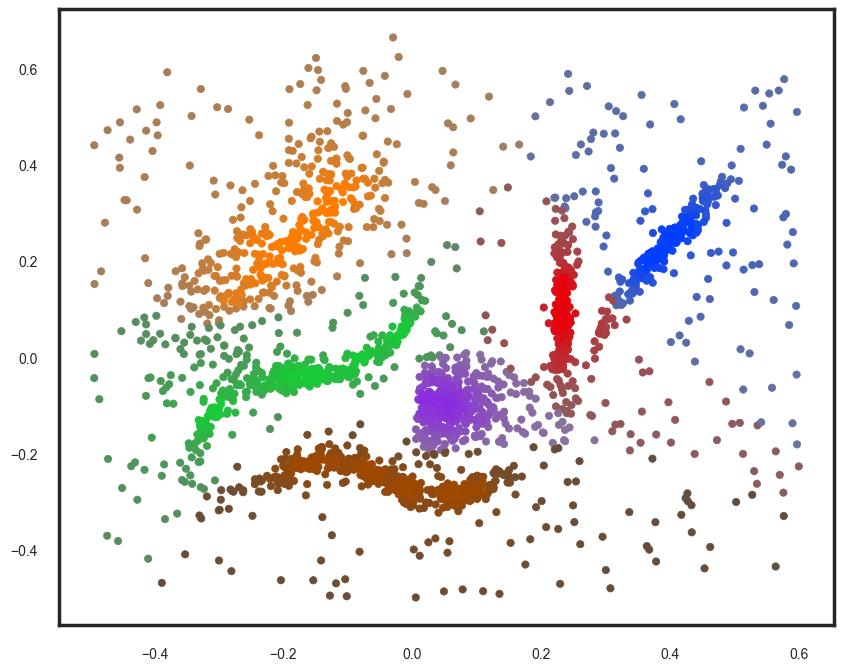

In [268]:
colors = np.empty((data.shape[0], 3))
for x in range(data.shape[0]):
    membership_vector = combined_membership_vector(x, data, tree, exemplar_dict, cluster_ids,
                                                   max_lambda_dict, point_dict, False)
    color = np.argmax(membership_vector)
    saturation = membership_vector[color]
    colors[x] = sns.desaturate(pal[color], saturation)
plt.figure(figsize=(10, 8))
plt.tick_params(labelsize=10)
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)

In [269]:
def prob_in_some_cluster(point, tree, cluster_ids, point_dict, max_lambda_dict):
    heights = []
    for cluster in cluster_ids:
        heights.append(merge_height(point, cluster, tree._raw_tree, point_dict))
    height = max(heights)
    nearest_cluster = cluster_ids[np.argmax(heights)]
    max_lambda = max_lambda_dict[nearest_cluster]
    return height / max_lambda

C:\Users\brain\AppData\Local\Temp\ipykernel_8116\3033185213.py:6: RuntimeWarning: divide by zero encountered in divide
  result = 1./dist_vector(point, exemplar_dict, data)


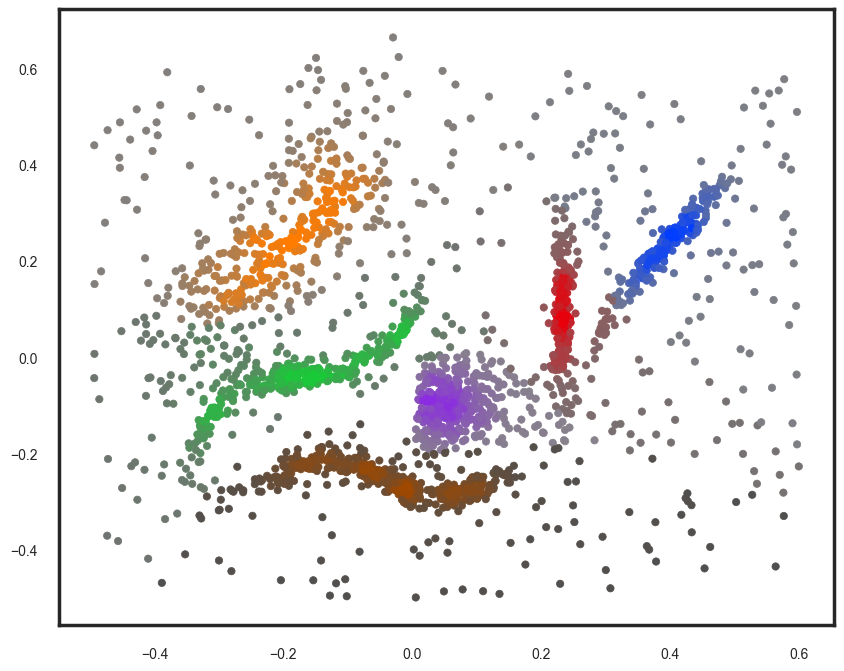

In [270]:
colors = np.empty((data.shape[0], 3))
for x in range(data.shape[0]):
    membership_vector = combined_membership_vector(x, data, tree, exemplar_dict, cluster_ids,
                                                   max_lambda_dict, point_dict, False)
    membership_vector *= prob_in_some_cluster(x, tree, cluster_ids, point_dict, max_lambda_dict)
    color = np.argmax(membership_vector)
    saturation = membership_vector[color]
    colors[x] = sns.desaturate(pal[color], saturation)
plt.figure(figsize=(10, 8))
plt.tick_params(labelsize=10)
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds);